<a href="https://colab.research.google.com/github/PutriAlivia/PCVK_Genap_2021/blob/main/Tugas%20Akhir_riceleaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [2]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
from google.colab import files 
files.upload()

Saving RiceLeaf.zip to RiceLeaf.zip


In [6]:
!unzip RiceLeaf.zip

Archive:  RiceLeaf.zip
  inflating: rice_leaf_diseases/Brown spot/DSC_0104.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0111.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0118.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0107.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0105.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0306.JPG  
  inflating: rice_leaf_diseases/Brown spot/DSC_0101.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0325.JPG  
  inflating: rice_leaf_diseases/Brown spot/DSC_0108.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0394.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0121.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0106.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0307.JPG  
  inflating: rice_leaf_diseases/Brown spot/DSC_0117.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0391.jpg  
  inflating: rice_leaf_diseases/Brown spot/DSC_0323.JPG  
  inflating: rice_leaf_diseases/Brown spot/DSC_03

In [7]:
directory = '/content/rice_leaf_diseases'

In [8]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Brown spot', 'Leaf smut', 'Bacterial leaf blight']
3


In [9]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

def mapper(value):
    return reverse_mapping[value]

In [10]:
dataset=[]
testset=[]
count=0
for name in Name:
    path=os.path.join(directory,name)
    t=0
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            if t<60:
                dataset.append([image,count])
            else:   
                testset.append([image,count])
            t+=1
    count=count+1

In [11]:
data,labels0=zip(*dataset)

In [12]:
labels1=to_categorical(labels0)
data=np.array(data)
labels=np.array(labels1)

In [13]:
print(len(labels))

53


In [14]:
trainx,testx,trainy,testy=train_test_split(data,labels,test_size=0.2,random_state=44)

In [15]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(42, 100, 100, 3)
(11, 100, 100, 3)
(42, 3)
(11, 3)


In [16]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [17]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(100,100,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [18]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(3, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [19]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [20]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=30)

Epoch 1/30
2/2 [==============================] - 16s 5s/step - loss: 1.5099 - accuracy: 0.3810 - val_loss: 1.2023 - val_accuracy: 0.5455
Epoch 2/30
2/2 [==============================] - 2s 932ms/step - loss: 1.3695 - accuracy: 0.5000 - val_loss: 1.3845 - val_accuracy: 0.4545
Epoch 3/30
2/2 [==============================] - 2s 946ms/step - loss: 0.7576 - accuracy: 0.7381 - val_loss: 1.1088 - val_accuracy: 0.5455
Epoch 4/30
2/2 [==============================] - 2s 2s/step - loss: 0.6901 - accuracy: 0.7619 - val_loss: 1.1594 - val_accuracy: 0.3636
Epoch 5/30
2/2 [==============================] - 2s 2s/step - loss: 0.4358 - accuracy: 0.8810 - val_loss: 1.0046 - val_accuracy: 0.6364
Epoch 6/30
2/2 [==============================] - 2s 822ms/step - loss: 0.4497 - accuracy: 0.8571 - val_loss: 0.9987 - val_accuracy: 0.6364
Epoch 7/30
2/2 [==============================] - 2s 824ms/step - loss: 0.3929 - accuracy: 0.8571 - val_loss: 1.1757 - val_accuracy: 0.6364
Epoch 8/30
2/2 [============

In [21]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.50      0.67      0.57         3
           1       0.86      0.86      0.86         7
           2       0.00      0.00      0.00         1

    accuracy                           0.73        11
   macro avg       0.45      0.51      0.48        11
weighted avg       0.68      0.73      0.70        11



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


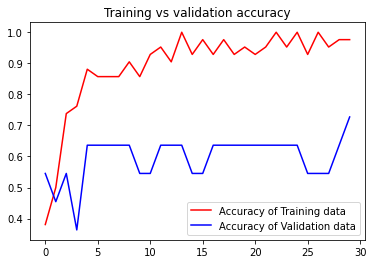

<Figure size 432x288 with 0 Axes>

In [22]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

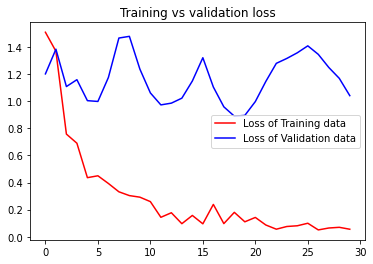

<Figure size 432x288 with 0 Axes>

In [23]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

Prediction is Brown spot.


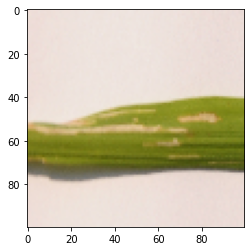

In [29]:
image=load_img("/content/rice_leaf_diseases/Bacterial leaf blight/DSC_0703.JPG",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
plt.imshow(image)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))

Prediction is Leaf smut.


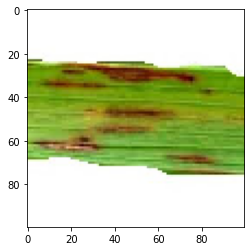

In [30]:
image=load_img("/content/rice_leaf_diseases/Leaf smut/DSC_0504.jpg",target_size=(100,100))

image=img_to_array(image) 
image=image/255.0
prediction_image=np.array(image)
prediction_image= np.expand_dims(image, axis=0)
plt.imshow(image)
prediction=model.predict(prediction_image)
value=np.argmax(prediction)
move_name=mapper(value)
#print(prediction)
#print(value)
print("Prediction is {}.".format(move_name))